## ***(x,y) 데이터를 이용해 이차방정식의 계수 추정하기***

In [ ]:
! pip install transformers pyqt5 tensorflow==2.5.0 scikit-learn matplotlib numpy

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


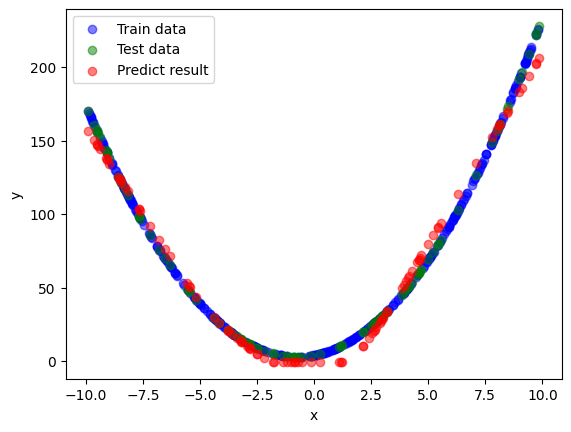

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# 이 부분을 10, 100, 500, 1000 으로 조정하면서 테스트
data_size = 500

# 데이터 생성: y = 2x^2 + 3x + 4
np.random.seed(42)
x = np.random.uniform(-10, 10, data_size).reshape(-1, 1)
y = 2 * x**2 + 3 * x + 4  # y는 2x^2 + 3x + 4의 형태로 생성된 데이터

# 학습 데이터와 테스트 데이터를 8:2 비율로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 딥러닝 모델 정의 및 학습
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=500, verbose=0)

# 테스트 데이터에 대한 예측
y_pred_test = model.predict(x_test)

# 원본 데이터와 예측 결과 시각화 (훈련 데이터와 테스트 데이터 구분)
plt.scatter(x_train, y_train, color='blue', label='Train data', alpha=0.5)
plt.scatter(x_test, y_test, color='Green', label='Test data', alpha=0.5)
plt.scatter(x_test, y_pred_test, color='Red', label='Predict result', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


## ***Tokenizer 다운로드***

In [10]:
from transformers import PreTrainedTokenizerFast

tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2",bos_token='</s>', eos_token='</s>', unk_token='<unk>',pad_token='<pad>', mask_token='<mask>')
tokenizer.save_pretrained("./my_tokenizer")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


('./my_tokenizer/tokenizer_config.json',
 './my_tokenizer/special_tokens_map.json',
 './my_tokenizer/tokenizer.json')

## ***Tokenizer를 이용해 문장을 숫자로 변환하기***

In [11]:
# 입력 문장
text = "산책을 나가볼까요?"

# 토큰화 및 ID 변환
tokens = tokenizer.tokenize(text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(tokens)
print(token_ids)

['▁산', '책을', '▁나가', '볼', '까', '요', '?']
[9145, 12115, 12312, 7656, 6969, 8084, 406]


## ***vocab 들여다보기: Tokenizer가 문장을 숫자로 변환하는 체계***

In [12]:
import json

with open('./my_tokenizer/tokenizer.json', 'r') as f:
    j = json.load(f)

j

{'version': '1.0',
 'truncation': None,
 'padding': None,
 'added_tokens': [{'id': 0,
   'content': '<s>',
   'single_word': False,
   'lstrip': False,
   'rstrip': False,
   'normalized': False,
   'special': True},
  {'id': 1,
   'content': '</s>',
   'single_word': False,
   'lstrip': False,
   'rstrip': False,
   'normalized': False,
   'special': True},
  {'id': 2,
   'content': '<usr>',
   'single_word': False,
   'lstrip': False,
   'rstrip': False,
   'normalized': False,
   'special': True},
  {'id': 3,
   'content': '<pad>',
   'single_word': False,
   'lstrip': False,
   'rstrip': False,
   'normalized': False,
   'special': True},
  {'id': 4,
   'content': '<sys>',
   'single_word': False,
   'lstrip': False,
   'rstrip': False,
   'normalized': False,
   'special': True},
  {'id': 5,
   'content': '<unk>',
   'single_word': False,
   'lstrip': False,
   'rstrip': False,
   'normalized': False,
   'special': True},
  {'id': 6,
   'content': '<mask>',
   'single_word': False